Textual Sentiment Analysis and Steganography Detection: Unveiling Hidden Messages in Reviews

In [1]:
!pip install wordcloud
!pip install nltk
!pip install pandas
!pip install scikit-learn
!pip install regex


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import random

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sashi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sashi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Load the dataset
imdb_data = pd.read_csv('IMDB-Dataset.csv')
imdb_data.head(100)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


In [5]:
# Function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [6]:
# Apply the cleaning function to the review column
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_text)
imdb_data_sampled = imdb_data.sample(frac=0.1)
# Display the first few rows of the cleaned data
imdb_data.head(100)
# Combine all reviews into a single string
all_reviews = ' '.join(imdb_data['cleaned_review'].tolist())

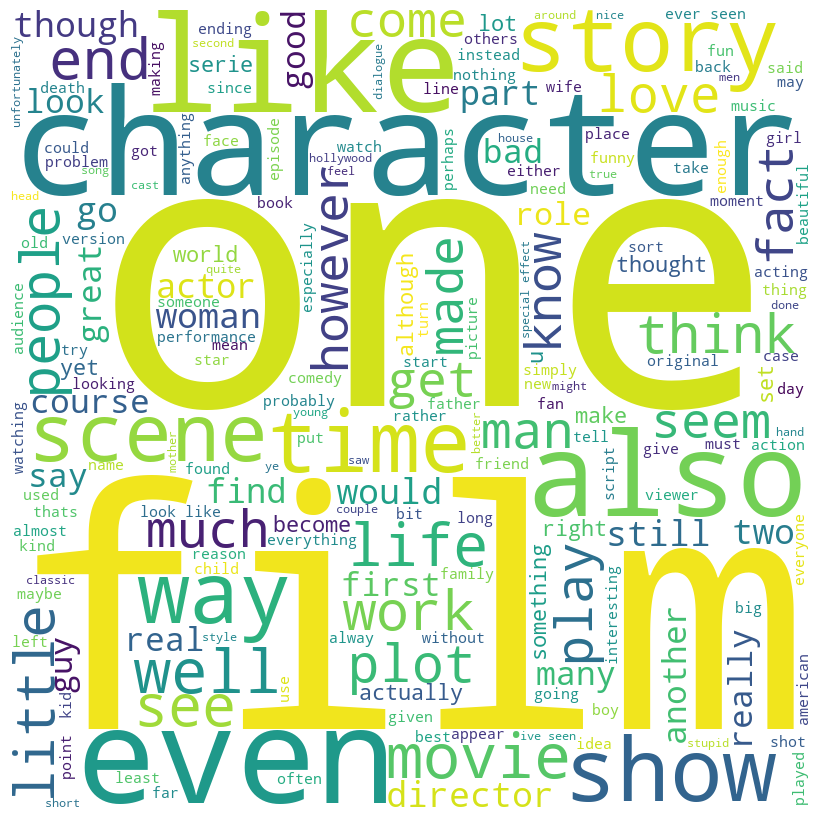

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


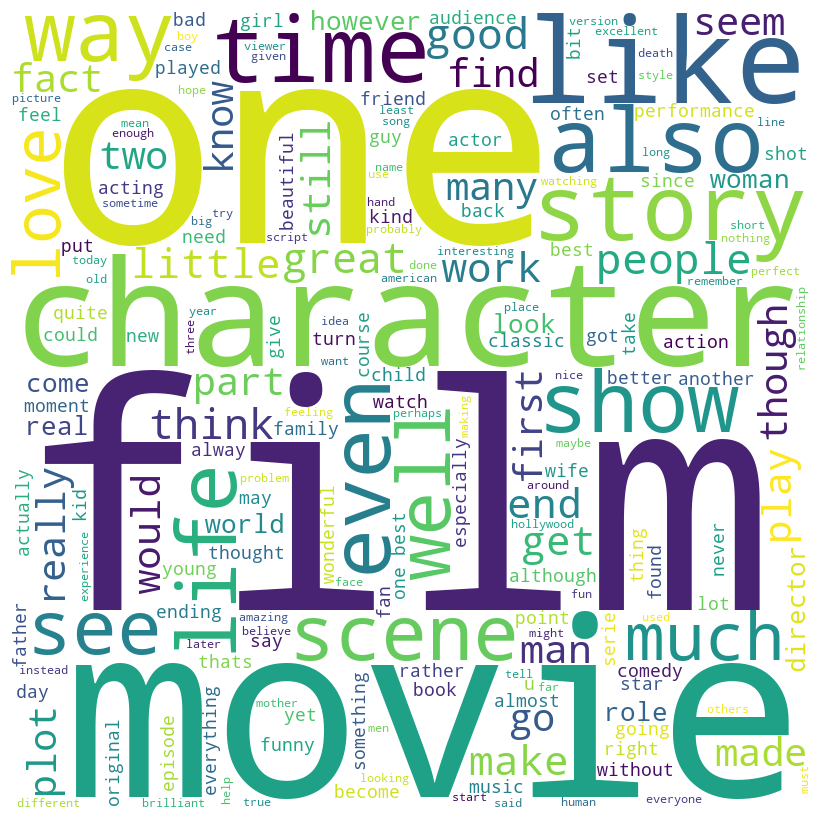

In [8]:
positive_reviews = imdb_data[imdb_data['sentiment'] == 'positive']['cleaned_review']

# Combine positive reviews into a single string
positive_all_reviews = ' '.join(positive_reviews.tolist())

# Create a word cloud for positive reviews
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords.words('english'),
                      min_font_size=10).generate(positive_all_reviews)

# Display the word cloud for positive reviews
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


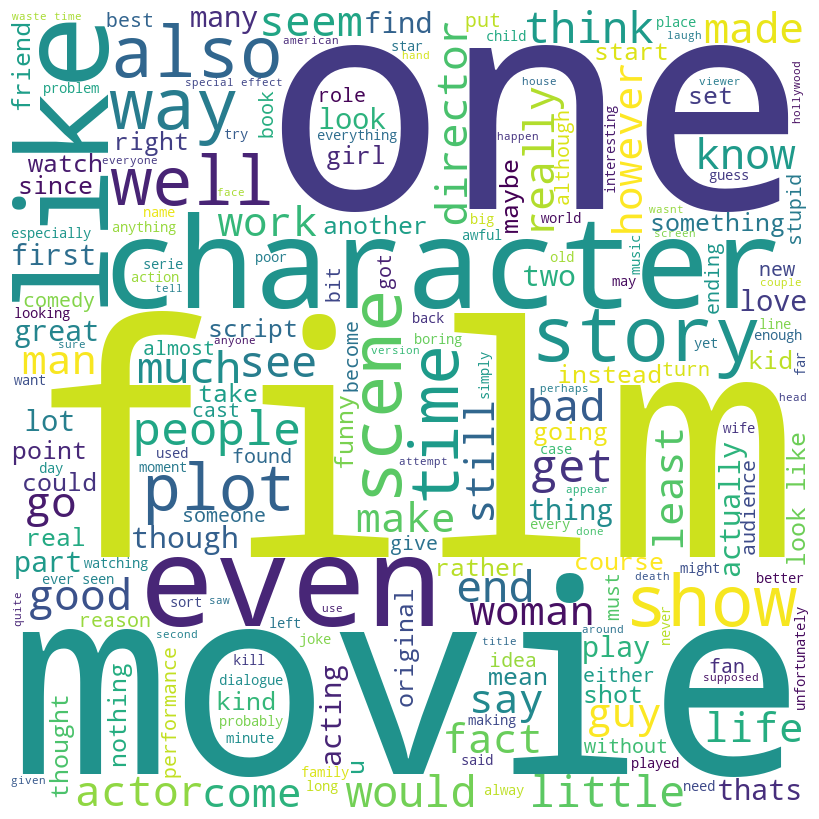

In [9]:
negative_reviews = imdb_data[imdb_data['sentiment'] == 'negative']['cleaned_review']

# Combine negative reviews into a single string
negative_all_reviews = ' '.join(negative_reviews.tolist())

# Create a word cloud for negative reviews
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords.words('english'),
                      min_font_size=10).generate(negative_all_reviews)

# Display the word cloud for negative reviews
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [10]:

X = imdb_data_sampled['cleaned_review']
y = imdb_data_sampled['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Testing Sentiment Analysis Model
X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print("Sentiment Analysis Model Test:")
print(classification_report(y_test, y_pred))

Sentiment Analysis Model Test:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       496
           1       0.89      0.74      0.81       504

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [11]:
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\sashi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


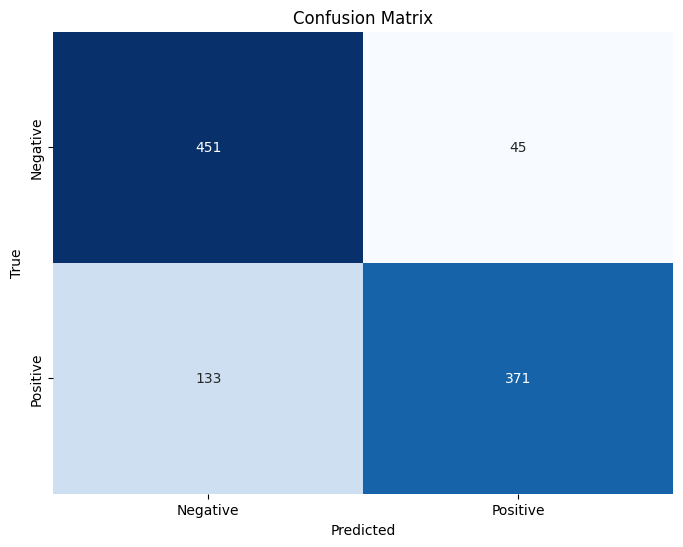

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


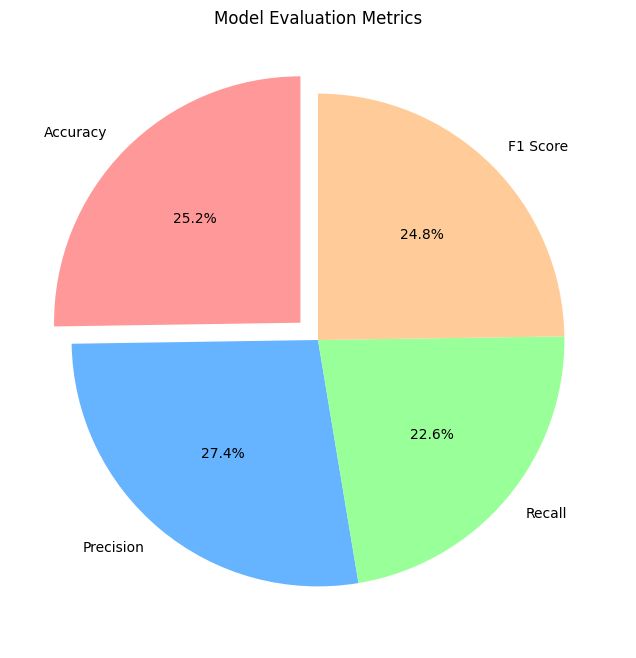

In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary to store the metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Plot pie chart
labels = metrics.keys()
sizes = metrics.values()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)  # explode the 1st slice (i.e., 'Accuracy')

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Model Evaluation Metrics")
plt.show()


In [23]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

def synonym_replacement(text, num_replacements):
    words = text.split()
    replaced_words = 0
    for i in range(len(words)):
        synonyms = get_synonyms(words[i])
        if synonyms and replaced_words < num_replacements:
            synonym = random.choice(synonyms)
            words[i] = synonym
            replaced_words += 1
    return ' '.join(words)

# Example
sample_text = ""
modified_text = synonym_replacement(sample_text, 2)  # Replace 2 words with synonyms
print(modified_text)

def text_to_binary(message):
    return ''.join(format(ord(c), '08b') for c in message)

def binary_to_text(binary):
    return ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary), 8))


In [15]:

def whitespace_encode(text, message):
    binary_message = text_to_binary(message)
    encoded_lines = []
    lines = text.split('\n')

    for i, line in enumerate(lines):
        if i < len(binary_message):
            encoded_line = line + (' ' if binary_message[i] == '1' else '')
        else:
            encoded_line = line
        encoded_lines.append(encoded_line)

    return '\n'.join(encoded_lines)

def whitespace_decode(encoded_text):
    lines = encoded_text.split('\n')
    binary_message = ''.join(['1' if line[-1] == ' ' else '0' for line in lines if line])
    return binary_to_text(binary_message[:len(binary_message) - (len(binary_message) % 8)])


In [16]:
def detect_whitespace_steganography(text):
    # Simple detection based on trailing spaces
    lines = text.split('\n')
    trailing_spaces_count = sum([1 for line in lines if line.endswith(' ')])

    # Assuming steganography if a certain percentage of lines end with a space
    # This threshold can be adjusted based on your specific use case
    threshold = 0.5  # Example threshold: 50% of lines
    return trailing_spaces_count / len(lines) > threshold


In [17]:
original_text = "This is a test.\nMake sure this text has enough lines.\nEach line encodes one bit."
hidden_message = "Hi"

encoded_text = whitespace_encode(original_text, hidden_message)
print("Encoded Text:\n", encoded_text)

binary_rep = text_to_binary(hidden_message)
print("Binary Representation of Message:", binary_rep)

decoded_message = whitespace_decode(encoded_text)
print("Decoded Message:\n", decoded_message)


Encoded Text:
 This is a test.
Make sure this text has enough lines. 
Each line encodes one bit.
Binary Representation of Message: 0100100001101001
Decoded Message:
 


In [18]:
# Assuming the IMDB dataset is loaded into imdb_data

# Hide a message in a fraction of the dataset
hidden_message = "Love  "
fraction = 0.1  # Fraction of the dataset to apply steganography

# Randomly select a subset of the dataset
stego_subset = imdb_data.sample(frac=fraction)
stego_subset['cleaned_review'] = stego_subset['cleaned_review'].apply(lambda x: whitespace_encode(x, hidden_message))

# Combine stego and non-stego data
non_stego_subset = imdb_data.drop(stego_subset.index)
imdb_stego_data = pd.concat([stego_subset, non_stego_subset])

# Add a label for steganography
imdb_stego_data['is_stego'] = 0
imdb_stego_data.loc[stego_subset.index, 'is_stego'] = 1


In [19]:
from sklearn.pipeline import make_pipeline

# Prepare the data
X = imdb_stego_data['cleaned_review']
y = imdb_stego_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Create and train the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X, y)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [20]:
# Apply the detection function
imdb_stego_data['detected_stego'] = imdb_stego_data['cleaned_review'].apply(detect_whitespace_steganography)


In [21]:
from sklearn.metrics import classification_report

# Evaluation
print(classification_report(imdb_stego_data['is_stego'], imdb_stego_data['detected_stego']))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45000
           1       0.00      0.00      0.00      5000

    accuracy                           0.90     50000
   macro avg       0.45      0.50      0.47     50000
weighted avg       0.81      0.90      0.85     50000



C:\Users\sashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471